In [4]:
import numpy as np
import pandas as pd
import scipy.stats as st
import math
import matplotlib.pyplot as plt
import seaborn as sns


# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

# import function to perform post-hoc
# install scikit_posthocs using "!pip install scikit_posthocs" 
!pip install scikit_posthocs
import scikit_posthocs

In [6]:
diabetes_df=pd.read_csv("D:\Dataset\diabetes.csv")

In [7]:
diabetes_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
diabetes_df.shape

(768, 9)

In [9]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Diabetes Pedigree Function vs. Outcome')

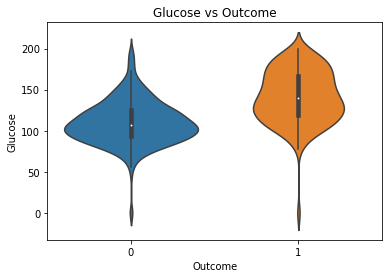

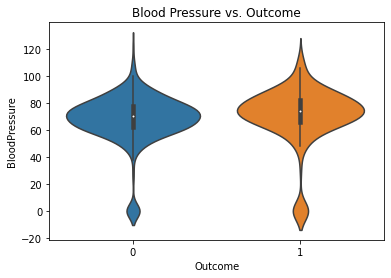

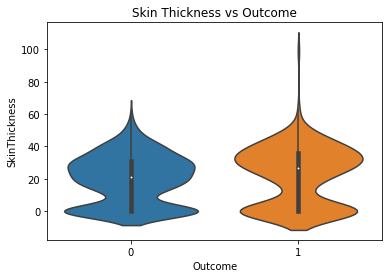

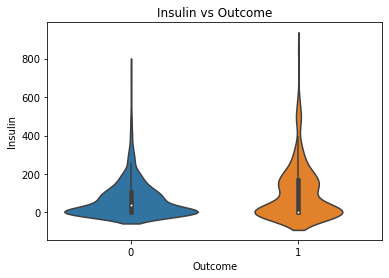

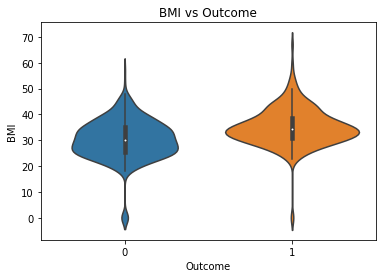

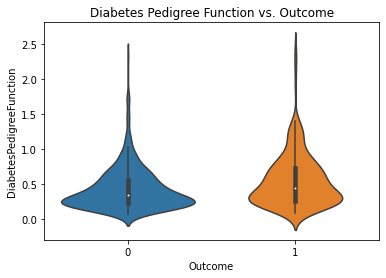

In [11]:
plt.figure(1)
sns.violinplot(x='Outcome',y='Glucose',data=diabetes_df)
plt.title('Glucose vs Outcome')
plt.figure(2)
sns.violinplot(x='Outcome',y='BloodPressure',data=diabetes_df)
plt.title('Blood Pressure vs. Outcome')
plt.figure(3)
sns.violinplot(x='Outcome',y='SkinThickness',data=diabetes_df)
plt.title('Skin Thickness vs Outcome')
plt.figure(4)
sns.violinplot(x='Outcome',y='Insulin',data=diabetes_df)
plt.title('Insulin vs Outcome')
plt.figure(5)
sns.violinplot(x='Outcome',y='BMI',data=diabetes_df)
plt.title('BMI vs Outcome')
plt.figure(6)
sns.violinplot(x='Outcome',y='DiabetesPedigreeFunction',data=diabetes_df)
plt.title('Diabetes Pedigree Function vs. Outcome')


In [12]:
positive_df=diabetes_df[diabetes_df['Outcome']==1]
negative_df=diabetes_df[diabetes_df['Outcome']==0]

positive_df=positive_df.replace({'Glucose':0},np.median(positive_df['Glucose']))
negative_df=negative_df.replace({'Glucose':0},np.median(negative_df['Glucose']))
df=[positive_df,negative_df]
diabetes_df=pd.concat(df)

In [13]:
positive_df=positive_df.replace({'BloodPressure':0},np.median(positive_df['BloodPressure']))
negative_df=negative_df.replace({'BloodPressure':0},np.median(negative_df['BloodPressure']))
df=[positive_df,negative_df]
diabetes_df=pd.concat(df)

In [14]:
positive_df=positive_df.replace({'SkinThickness':0},np.median(positive_df['SkinThickness']))
negative_df=negative_df.replace({'SkinThickness':0},np.median(negative_df['SkinThickness']))
df=[positive_df,negative_df]
diabetes_df=pd.concat(df)

In [15]:
positive_df=positive_df.replace({'Insulin':0},np.median(positive_df['Insulin']))
negative_df=negative_df.replace({'Insulin':0},np.median(negative_df['Insulin']))
df=[positive_df,negative_df]
diabetes_df=pd.concat(df)

In [16]:
positive_df=positive_df.replace({'BMI':0},np.median(positive_df['BMI']))
negative_df=negative_df.replace({'BMI':0},np.median(negative_df['BMI']))
df=[positive_df,negative_df]
diabetes_df=pd.concat(df)

In [17]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.378906,27.43099,91.783854,32.433919,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.104431,9.32146,108.121136,6.880664,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.00000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,21.00000,39.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,27.00000,39.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.00000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.00000,846.000000,67.100000,2.420000,81.000000,1.000000


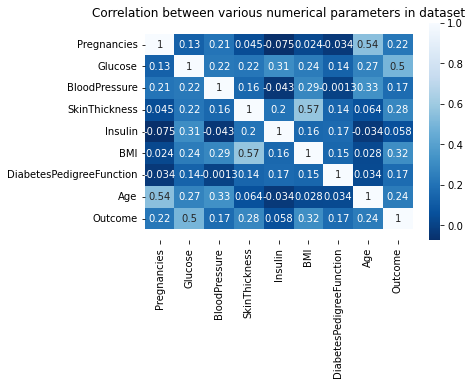

In [18]:
mat=diabetes_df.corr()
ax=sns.heatmap(mat,annot=True,fmt='.2g',cmap='Blues_r')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Correlation between various numerical parameters in dataset')
plt.show()

In [19]:
diabetes_df.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


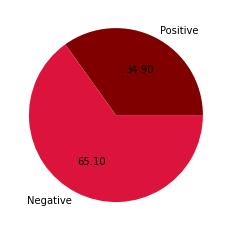

In [20]:
l1=len(positive_df)
l2=len(negative_df)
values=[round(l1/(l1+l2)*100,2),round(l2/(l1+l2)*100,2)]
label=['Positive','Negative']
plt.pie(x=[l1,l2],labels=label,autopct='%.2f',colors=['maroon','crimson'])
plt.show()

In [54]:
df = diabetes_df
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,27,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62,21,39,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,39,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [55]:
x = df.iloc[:,0:-1]

In [56]:
y = df.iloc[:,-1:]

In [57]:
y

,Outcome
0,1
2,1
4,1
6,1
8,1
...,...
762,0
763,0
764,0
765,0


In [58]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
2,8,183,64,27,0,23.3,0.672,32
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
...,...,...,...,...,...,...,...,...
762,9,89,62,21,39,22.5,0.142,33
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,39,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30


In [59]:
from sklearn.model_selection import train_test_split

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state= 0 )

In [64]:
mod = LogisticRegression()

In [65]:
mod.fit(x_train,y_train)

C:\Users\leojn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\leojn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
y_pred = mod.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [68]:
accuracy_score(y_pred,y_test)

0.7792207792207793

In [69]:
confusion_matrix(y_pred,y_test)

array([[85, 21],
       [13, 35]], dtype=int64)

### Hypothesis Testing 

In [22]:
preg_0=positive_df[positive_df['Pregnancies']==0]
preg_1=positive_df[positive_df['Pregnancies']==1]
preg_2=positive_df[positive_df['Pregnancies']==2]
preg_3=positive_df[positive_df['Pregnancies']==3]
preg_4=positive_df[positive_df['Pregnancies']==4]
preg_5=positive_df[positive_df['Pregnancies']==5]
preg_6=positive_df[positive_df['Pregnancies']==6]
preg_7=positive_df[positive_df['Pregnancies']==7]
preg_8=positive_df[positive_df['Pregnancies']==8]
preg_9=positive_df[positive_df['Pregnancies']==9]
preg_10=positive_df[positive_df['Pregnancies']==10]
preg_11=positive_df[positive_df['Pregnancies']==11]
preg_12=positive_df[positive_df['Pregnancies']==12]
preg_13=positive_df[positive_df['Pregnancies']==13]
preg_14=positive_df[positive_df['Pregnancies']==14]
preg_15=positive_df[positive_df['Pregnancies']==15]
preg_16=positive_df[positive_df['Pregnancies']==16]
preg_17=positive_df[positive_df['Pregnancies']==17]

#### Blood Pressure vs. Outcome 

$$H0:(Mu_{bloodpressure})_{diabteic}-(Mu_{blood pressure})_{non-diabetic} \leq 0$$

$$H1:(Mu_{bloodpressure})_{diabteic}-(Mu_{blood pressure})_{non-diabetic} > 0$$

In [23]:
print(st.shapiro(positive_df['BloodPressure'])[1],st.shapiro(negative_df['BloodPressure'])[1])
print(st.mannwhitneyu(negative_df['BloodPressure'],positive_df['BloodPressure'],alternative='less'))

0.0010561159579083323 0.0004950868315063417
MannwhitneyuResult(statistic=52131.0, pvalue=1.867937406180911e-07)


#### Shapiro Test result
The pvalue<<0.05 the data is not normally distributed. We shall now continue with the MannWhitneyU test.<br>
Result of MannWhitneyU Test<br>
pvalue<0.05. Test statistic falls in rejection region.We now reject H0.<br>
We can now conclude that Blood Pressure is higher for Diabetic women<br>

 

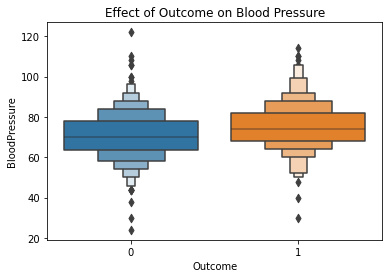

In [24]:
sns.boxenplot(x='Outcome',y='BloodPressure',data=diabetes_df)
plt.title('Effect of Outcome on Blood Pressure')
plt.show()

###### From the above graph we can see that medain of Blood Pressure for diabetic women is slightly higher than for non- diabetic women

#### Diabetic patients tend to have a BP of 80 or above

$$H0:(M)_{bloodpressure} \leq 80$$
$$H1:(M)_{bloodpressure} > 80$$
 
 

In [25]:
mu=80
bp=[]
for i in positive_df['BloodPressure']:
    bp.append(i-mu)
    
st.wilcoxon(bp,alternative='greater')

WilcoxonResult(statistic=8576.0, pvalue=0.9999999999762162)

pvalue>0.95. The test statistic falls in the rejection region.<br>
Therefore we reject H0.<br> Women with BP above 80 (or high BP) are at a higher risk of getting diabetes<br>
We shall further check if diabetic women tend to have varying blood pressure based on pregnancies<br>

#### Blood Pressure vs. Pregnancies

We shall start the process with a shapiro test to check for normality of datasets.<br>
Following this we shall conduct a shapiro test on p.<br>
If the pvalue of the test<0.05 we shall break out of the loop.<br>
If any one of the datasets are not normally distributed, we shall then proceed with the kruskal test which is a non-parametric equivalent of one way ANOVA.<br> 

In [26]:
for i in range(18):
    p=positive_df[positive_df['Pregnancies']==i]['BloodPressure']
    if st.shapiro(p)[1]>0.95 or st.shapiro(p)[1]<0.05:
        print(i)
        print(st.shapiro(p))
        break

5
ShapiroResult(statistic=0.8932729363441467, pvalue=0.025970375165343285)


Pregnancy 5 dataset is not normally distributed thus we shall proceed with Kruskal test to determine if the means of all values are equal.<br>
#### Hypothesis:
H0: Average Blood Pressure of all the pregnancies are same<br>
H1: Average Blood Pressure of atleast one pregnancy is different

In [27]:
print(st.kruskal(preg_0['BloodPressure'],preg_1['BloodPressure'],preg_2['BloodPressure'],preg_3['BloodPressure'],preg_4['BloodPressure'],preg_5['BloodPressure'],preg_6['BloodPressure'],preg_7['BloodPressure'],preg_8['BloodPressure'],preg_9['BloodPressure'],preg_10['BloodPressure'],preg_11['BloodPressure'],preg_12['BloodPressure'],preg_13['BloodPressure'],preg_14['BloodPressure'],preg_15['BloodPressure'],preg_17['BloodPressure']))

KruskalResult(statistic=23.13954284790189, pvalue=0.11005480973799606)


The pvalue of the test is >0.05. Statistic falls in the non rejection region.<br>
We fail to reject H0.<br>
#### Conclusion:<br> 
Average BP of all pregnancies in diabetic women are the same. (or) Blood Pressure does not change with pregnancy

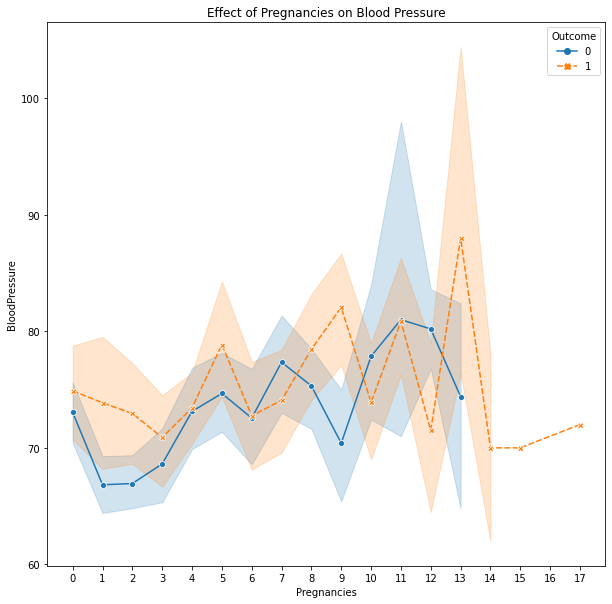

In [28]:
plt.figure(figsize=(10,10))
ax=sns.lineplot(x='Pregnancies',y='BloodPressure',data=diabetes_df,hue='Outcome',style='Outcome',markers=True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.title('Effect of Pregnancies on Blood Pressure')
plt.show()

#### BMI vs Outcome<br>
BMI of diabetic women tend to be higher than for non-diabetic women<br>
$$H0:(Mu_{BMI})_{diabteic}-(Mu_{BMI})_{non-diabetic} \leq 0$$<br>
$$H1:(Mu_{BMI})_{diabteic}-(Mu_{BMI})_{non-diabetic}>0$$<br>

In [29]:
print("Shapiro: ",st.shapiro(positive_df['BMI'])[1],st.shapiro(negative_df['BMI'])[1])
print(st.mannwhitneyu(negative_df['BMI'],positive_df['BMI'],alternative='less'))


Shapiro:  4.4691375933325617e-08 4.4733014874509536e-06
MannwhitneyuResult(statistic=41626.0, pvalue=2.379984980745742e-18)


#### Result of Shapiro test<br>
Since pvalue for both datasets <<0.05 we can conclude that both the datasets are not normal.<br> 
We shall now continue with the MannWhitneyU test.<br>
Result of MannWhitneyU test<br>
pvalue<0.05. The test statistic falls in the rejection region. We can therefore reject H0.<br>
Thus we can conclude that BMI is higher for Diabetic women<br>

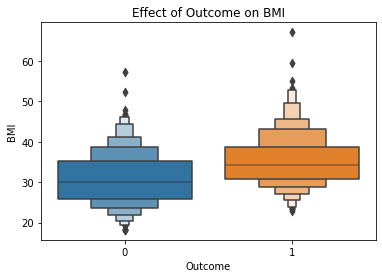

In [30]:
sns.boxenplot(x='Outcome',y='BMI',data=diabetes_df)
plt.title('Effect of Outcome on BMI')
plt.show()

The above graph proves our hypothesis that diabetic women tend to have a higher BMI

#### $$H0:(Mu_{BMI})_{diabetic} \leq 36$$
#### $$H1:(Mu_{BMI})_{diabetic} > 36$$

In [31]:
mu=36
bmi=[]
for i in positive_df['BMI']:
    bmi.append(i-mu)
print(st.wilcoxon(bmi,alternative='greater'))

WilcoxonResult(statistic=14435.5, pvalue=0.9968762501767908)


From the above result we can see that women who are obese are at a greater risk of getting diabetes.<br>
We shall see if pregnancies actually impact BMI in diabetic women<br>

#### BMI vs Pregnancies

In [32]:
for i in range(18):
    p=positive_df[positive_df['Pregnancies']==i]['BMI']
    if st.shapiro(p)[1]>0.95 or st.shapiro(p)[1]<0.05:
        print(i)
        print(st.shapiro(p))
        break

0
ShapiroResult(statistic=0.8856268525123596, pvalue=0.0010262097930535674)


Pregnancy 0 dataset is not normally distributed thus we shall proceed with Kruskal test to determine if the means of all values are equal.<br>
Hypothesis:<br>
H0: Average BMI of all the pregnancies are same<br>
H1: Average BMI of atleast one pregnancy is different<br>

In [33]:
print(st.kruskal(preg_0['BMI'],preg_1['BMI'],preg_2['BMI'],preg_3['BMI'],preg_4['BMI'],preg_5['BMI'],preg_6['BMI'],preg_7['BMI'],preg_8['BMI'],preg_9['BMI'],preg_10['BMI'],preg_11['BMI'],preg_12['BMI'],preg_13['BMI'],preg_14['BMI'],preg_15['BMI'],preg_17['BMI']))

KruskalResult(statistic=33.684187454400174, pvalue=0.005990700655478816)


pvalue<0.05 test statistic falls in the rejection region<br>
We shall then conclude that BMI is dependant on number of pregnancies a woman has had<br>
We shall conduct a posthoc test to check which combinations of pregnancies does not have the same average BMI<br>

In [34]:
df_bmi=scikit_posthocs.posthoc_conover(a=positive_df,val_col='BMI',group_col='Pregnancies')
df_bmi

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
0,1.000000,0.659546,0.021665,0.000346,0.003003,0.282621,0.000210,0.032677,0.004286,0.002228,0.125801,0.937616,0.210216,0.574349,0.627446,0.922124,0.566878
1,0.659546,1.000000,0.068258,0.002896,0.015138,0.521296,0.001307,0.104725,0.019717,0.010333,0.234366,0.738076,0.302073,0.743244,0.739082,0.838209,0.498350
2,0.021665,0.068258,1.000000,0.378824,0.646287,0.261333,0.165479,0.752452,0.694799,0.475830,0.791626,0.124513,0.983927,0.448335,0.690141,0.466426,0.231661
3,0.000346,0.002896,0.378824,1.000000,0.668744,0.033941,0.510407,0.195685,0.623961,0.923838,0.322017,0.026692,0.637300,0.185976,0.444916,0.321119,0.143569
4,0.003003,0.015138,0.646287,0.668744,1.000000,0.099593,0.312424,0.409795,0.948114,0.769212,0.517030,0.057447,0.808617,0.289161,0.551916,0.384010,0.180263
5,0.282621,0.521296,0.261333,0.033941,0.099593,1.000000,0.013189,0.379949,0.117298,0.066808,0.510623,0.457161,0.501111,0.959594,0.935718,0.702112,0.394138
6,0.000210,0.001307,0.165479,0.510407,0.312424,0.013189,1.000000,0.077224,0.289256,0.490836,0.154793,0.011519,0.410486,0.096933,0.306405,0.237577,0.099933
7,0.032677,0.104725,0.752452,0.195685,0.409795,0.379949,0.077224,1.000000,0.454210,0.285325,0.984606,0.172263,0.842381,0.560453,0.785086,0.523016,0.267195
8,0.004286,0.019717,0.694799,0.623961,0.948114,0.117298,0.289256,0.454210,1.000000,0.725165,0.553388,0.064934,0.837024,0.309319,0.570331,0.394896,0.186901
9,0.002228,0.010333,0.475830,0.923838,0.769212,0.066808,0.490836,0.285325,0.725165,1.000000,0.391980,0.040703,0.685936,0.223741,0.476386,0.339476,0.155126


In [35]:
t=[]
for k in df_bmi:
    i=0
    for v in df_bmi[k]:
        if v<0.05 or v>0.95:
            if v!=1 :
                t.append((k,i))
        i=i+1
for i in t:
    for j in t:
        if (i[0]==j[1]) and( i[1]==j[0]):
            t.remove(j)
print(t)

[(0, 2), (0, 3), (0, 4), (0, 6), (0, 7), (0, 8), (0, 9), (1, 3), (1, 4), (1, 6), (1, 8), (1, 9), (2, 12), (3, 5), (3, 11), (5, 6), (5, 13), (6, 11), (7, 10), (9, 11), (11, 15)]


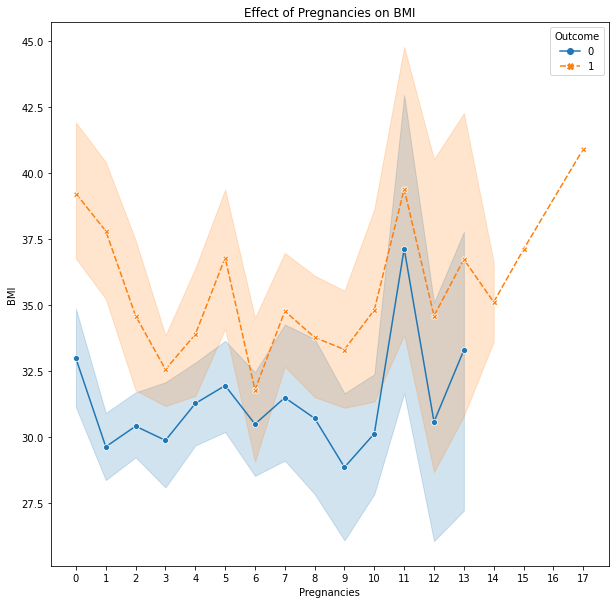

In [36]:
plt.figure(figsize=(10,10))
ax=sns.lineplot(x='Pregnancies',y='BMI',data=diabetes_df,hue='Outcome',style='Outcome',markers=True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.title('Effect of Pregnancies on BMI')
plt.show()

#### With regard to Outcome<br>
BMI tends to be higher for diabetic women as compared to non-diabetic women.<br>
#### With respect to Pregnancies<br>
For women with 0 pregnancies, BMI tends to be on the higher side for both Outcomes. Following this we see a drop in BMI with increase in Pregnancies irregardless of Outcome upto the 3rd pregnancy. 

#### Diabetes Pedigree Function vs Outcome

##### Diabetes Pedigree Function for diabetic women is higer than for non-diabetic women

$$H0:(Mu_{DiabetesPedigreeFunction})_{diabetic}-(Mu_{DiabetesPedigreeFunction})_{non-diabetic} \leq 0$$

$$H1:(Mu_{DiabetesPedigreeFunction})_{diabetic}-(Mu_{DiabetesPedigreeFunction})_{non-diabetic}>0$$

In [37]:
print("Shapiro test: ",st.shapiro(positive_df['DiabetesPedigreeFunction'])[1],st.shapiro(negative_df['DiabetesPedigreeFunction'])[1])
print(st.mannwhitneyu(negative_df['DiabetesPedigreeFunction'],positive_df['DiabetesPedigreeFunction'],alternative='less'))

Shapiro test:  5.16110811992496e-15 9.733450524757011e-23
MannwhitneyuResult(statistic=52769.0, pvalue=5.982917206959746e-07)


#### Result of Shapiro test<br>
pvalue for both datasets<0.05.<br>
We can therefore conclude that both datasets are not normally distributed. We shall now proceed with the mannwhitneyU test.<br>
Result for MannwhitneyU test<br>
pvalue<0.05.<br> 
Test statistic falls in the rejection region. We therefore reject H0.<br>
We can then conclude that Diabetes Pedigree Function for diabetic women is greater than for non-diabetic women<br>

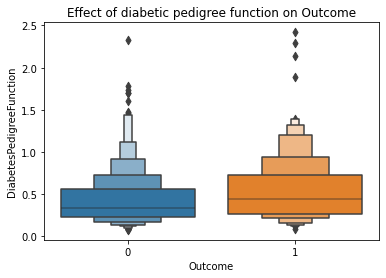

In [38]:
sns.boxenplot(x='Outcome',y='DiabetesPedigreeFunction',data=diabetes_df)
plt.title('Effect of diabetic pedigree function on Outcome')
plt.show()

Thus we can see that diabetic women tend to have a higher Diabetes Pedigree Function

People with diabetes tend to have a Diabetic Pedigree Function >0.6

$$H0:(Mu_{diabeticpedigreefunction})_{diabetic} \leq 0.6$$
$$H1:(Mu_{diabeticpedigreefunction})_{diabetic} > 0.6$$

In [39]:
mu=0.6
dpf=[]
for i in positive_df['DiabetesPedigreeFunction']:
    dpf.append(i-mu)
print(st.wilcoxon(dpf,alternative='greater'))

WilcoxonResult(statistic=12806.5, pvalue=0.9999799834356943)


For a value of Diabetes Pedigree Function of 0.6 tendancy to have diabetes is higher in women.
Diabetic Pedigree function is an inherent property of genetics. Thus number of pregnancies will not change this value.

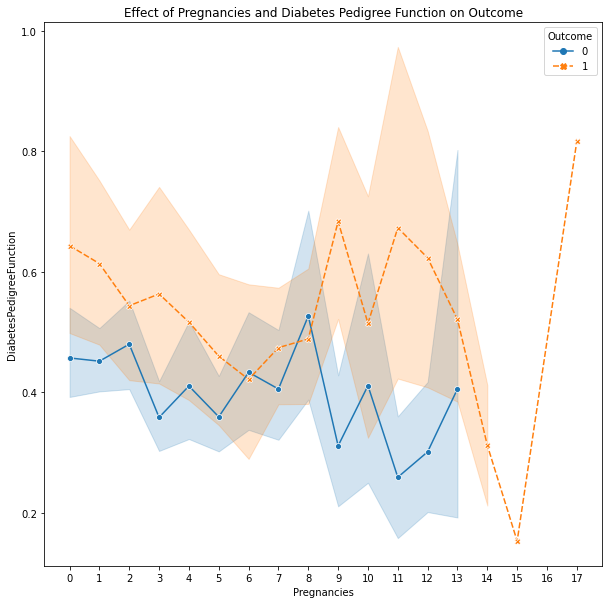

In [40]:
plt.figure(figsize=(10,10))
ax=sns.lineplot(x='Pregnancies',y='DiabetesPedigreeFunction',data=diabetes_df,hue='Outcome',style='Outcome',markers=True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.title('Effect of Pregnancies and Diabetes Pedigree Function on Outcome')
plt.show()


#### Glucose vs. Outcome

$$H0:(Mu_{glucose})_{diabetic}-(Mu_{glucose})_{nondiabetic}\leq 0$$
 

$$H1:(Mu_{glucose})_{diabetic}-(Mu_{glucose})_{nondiabetic}>0$$

In [41]:
print("Shapiro test: ",st.shapiro(positive_df['Glucose'])[1],st.shapiro(negative_df['Glucose'])[1])
print(st.mannwhitneyu(negative_df['Glucose'],positive_df['Glucose'],alternative='less'))

Shapiro test:  0.00012286074343137443 1.072575201988002e-07
MannwhitneyuResult(statistic=27613.0, pvalue=1.7219946851457248e-41)


#### Result of Shapiro test
Both datasets are not normally distributed therefore we proceed with manwhitneyu test.<br>
Result of MannWhitneyU test<br>
pvalue<0.05. Test statistic falls in the rejection region. Thus we reject H0.<br>
Thus we conclude that Glucose level for diabetic women is higher than for non-diabetic women<br>

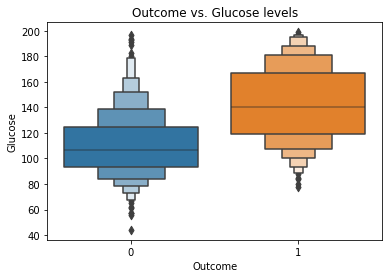

In [42]:
sns.boxenplot(x='Outcome',y='Glucose',data=diabetes_df)
plt.title('Outcome vs. Glucose levels')
plt.show()

#### Threshold value for Glucose 

$$H0:(Mu_{glucose})_{diabetic} \leq 150$$
 

$$H1:(Mu_{glucose})_{diabetic} > 150$$

In [43]:
mu=150
dpf=[]
for i in positive_df['Glucose']:
    dpf.append(i-mu)
print(st.wilcoxon(dpf,alternative='greater'))

WilcoxonResult(statistic=12879.0, pvalue=0.9999636175633667)


women who have a glucose level>150 are at a higher risk of getting diabetic

#### Glucose vs. Pregnancies

In [44]:
for i in range(18):
    p=positive_df[positive_df['Pregnancies']==i]['Glucose']
    if st.shapiro(p)[1]>0.95 or st.shapiro(p)[1]<0.05:
        print(i)
        print(st.shapiro(p))
        break

3
ShapiroResult(statistic=0.9203853607177734, pvalue=0.040333446115255356)


#### Kruskal Wallis test
Since atleast one dataset is not normally distributed we shall proceed with Kruskal test.<br>
Hypothesis:<br>
H0: Average Glucose levels is the same for all pregnancies.<br>
H1: Average Glucose levels is not the same for all pregnancies<br>

In [45]:
print(st.kruskal(preg_0['Glucose'],preg_1['Glucose'],preg_2['Glucose'],preg_3['Glucose'],preg_4['Glucose'],preg_5['Glucose'],preg_6['Glucose'],preg_7['Glucose'],preg_8['Glucose'],preg_9['Glucose'],preg_10['Glucose'],preg_11['Glucose'],preg_12['Glucose'],preg_13['Glucose'],preg_14['Glucose'],preg_15['Glucose'],preg_17['Glucose']))

KruskalResult(statistic=12.70637226899216, pvalue=0.6940933987956326)


Since pvalue>0.05 test stastic falls in the non-rejection region.<br>
Conclusion: Average glucose levels does not change with pregnancies if a woman is diabetic<br> 

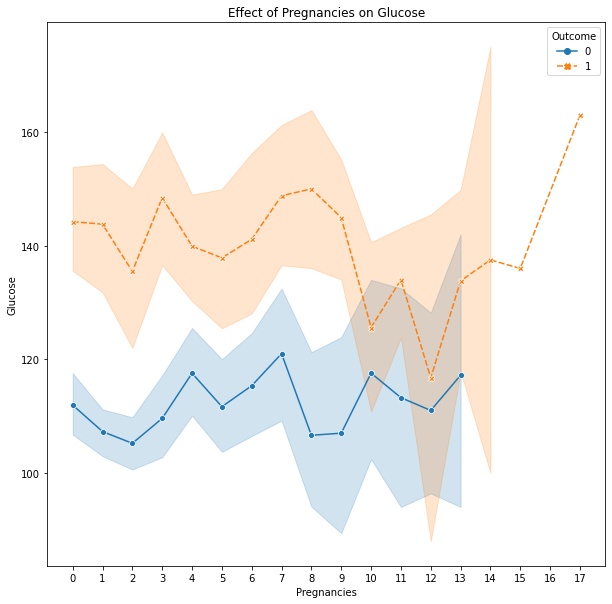

In [46]:
plt.figure(figsize=(10,10))
ax=sns.lineplot(x='Pregnancies',y='Glucose',data=diabetes_df,hue='Outcome',style='Outcome',markers=True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.title('Effect of Pregnancies on Glucose')
plt.show()

Generally Glucose level is higher for diabetic women but there is no such visible pattern for pregnancy

#### Effect of outcome on Skin Thickness

$$H0:(Mu_{st})_{non-diabetic}-(Mu_{st})_{diabetic} \geq 0$$
$$H1:(Mu_{st})_{non-diabetic}-(Mu_{st})_{diabetic}<0$$
 

In [47]:
print("Shapiro test: ",st.shapiro(positive_df['SkinThickness'])[1],st.shapiro(negative_df['SkinThickness'])[1])
print(st.mannwhitneyu(negative_df['SkinThickness'],positive_df['SkinThickness'],alternative='less'))

Shapiro test:  1.4130575261801846e-15 9.89973907564905e-15
MannwhitneyuResult(statistic=40360.0, pvalue=3.1338207073224587e-20)


#### Result of Shapiro test<br>
pvalue for both datasets<0.05. Both datasets are not normally distributed. We shall then continue on with MannWhitneyU test<br>
Result of MannWhitneyU test<br>
pvalue <0.05. Test Statistic falls in the rejection region. Thus we reject H0.<br>
We can now conclude that Skin Thickness for diabetic women is greater than that of non-diabetic women.<br>

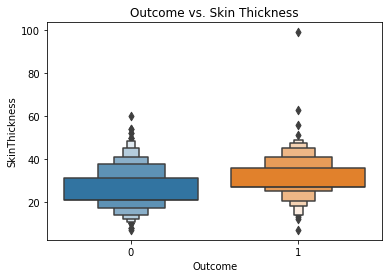

In [48]:
sns.boxenplot(x='Outcome',y='SkinThickness',data=diabetes_df)
plt.title('Outcome vs. Skin Thickness')
plt.show()

#### Threshold value for skin thickness
$$H0:(Mu)skinthickness≤35$$
$$H1:(Mu)skinthickness>35$$

In [49]:
mu=35
sth=[]
for i in positive_df['SkinThickness']:
    sth.append(i-mu)
print(st.wilcoxon(sth,alternative='greater'))

WilcoxonResult(statistic=7366.5, pvalue=0.9999999999999991)


Fom the above test we can see that skin thickness >35 for women who have diabetes<br>
Check if skin thickness of diabetic women change with number of pregnancies

#### Skin Thickness vs Pregnancies

In [50]:
for i in range(18):
    p=positive_df[positive_df['Pregnancies']==i]['BloodPressure']
    if st.shapiro(p)[1]>0.95 or st.shapiro(p)[1]<0.05:
        print(i)
        print(st.shapiro(p))
        break

5
ShapiroResult(statistic=0.8932729363441467, pvalue=0.025970375165343285)


pvalue of pregnancy 5 dataset<0.05. Thus atleast 1 dataset is not normally distributed. Kruskal Wallis test<br>
Hypothesis:<br>
H0:Average skin thickness is same for all pregnancies in diabetic women<br>
H1:Average skin thickness is different for atleast 1 pregnancy in diabetic women.<br>

In [51]:
print(st.kruskal(preg_0['SkinThickness'],preg_1['SkinThickness'],preg_2['SkinThickness'],preg_3['SkinThickness'],preg_4['SkinThickness'],preg_5['SkinThickness'],preg_6['SkinThickness'],preg_7['SkinThickness'],preg_8['SkinThickness'],preg_9['SkinThickness'],preg_10['SkinThickness'],preg_11['SkinThickness'],preg_12['SkinThickness'],preg_13['SkinThickness'],preg_14['SkinThickness'],preg_15['SkinThickness'],preg_17['SkinThickness']))

KruskalResult(statistic=18.092429071114545, pvalue=0.3185123596517917)


Since p value>0.05 stastic falls in the non-rejection region.<br>
We fail to reject H0.<br>
Conclusion: Pregnancies does not change the skin thickness in diabetic women<br>

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.lineplot(x='Pregnancies',y='SkinThickness',data=diabetes_df,hue='Outcome',style='Outcome',markers=True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.title('Effect of Pregnancies on Skin Thickness')
plt.show()

Skin Thickness for diabetic women is greater than non-diabetic women but there is no clear pattern for number of pregnancies

#### Insulin vs Outcome

$$(Mu_{insulin})_{diabetic}-(Mu_{insulin})_{non-diabetic} \geq 0$$

$$(Mu_{insulin})_{diabetic}-(Mu_{insulin})_{non-diabetic} < 0$$

In [ ]:
print("Shapiro test: ",st.shapiro(positive_df['Insulin'])[1],st.shapiro(negative_df['Insulin'])[1])
print(st.mannwhitneyu(positive_df['Insulin'],negative_df['Insulin'],alternative='less'))

#### Result of Shapiro test
pvalue for both datasets>0.05. Both datasets are not normally distributed. We shall then continue on with MannWhitneyU test<br>
Result of MannWhitneyU test<br>
pvalue <0.05. Test Statistic falls in the rejection region. Thus we reject H0.<br>
We can now conclude that Insulin for diabetic women is lesser than that of non-diabetic women<br>

In [ ]:
sns.boxplot(x='Outcome',y='Insulin',data=diabetes_df)
plt.title('Outcome vs. Insulin levels')
plt.show()

#### Hypothesis:
$$H0:(Mu_{positive})_{insulin} \geq 95$$
$$H1:(Mupositive)insulin<95$$

In [ ]:
mu=95
insulin=[]
for i in positive_df['Insulin']:
    insulin.append(i-mu)
print(st.wilcoxon(insulin,alternative='less'))

We can see that the pvalue<0.05 thus statistic falls in the rejection region.<br>
We shall reject H0.<br>
Thus women wih diabetes tends to have an Insulin level<95<br>

#### Insulin vs Pregnancies

In [ ]:
for i in range(18):
    p=positive_df[positive_df['Pregnancies']==i]['Insulin']
    if st.shapiro(p)[1]>0.95 or st.shapiro(p)[1]<0.05:
        print(i)
        print(st.shapiro(p))
        break

Since atleast 1 of the shapiro test fails we shall proceed with Kruskal Wallis test:<br>
Hypothesis:<br>
H0: Average Insulin level remains same for all pregnancies<br>
H1: Average insulin values is different for atleast 1 pregnancies<br>

In [ ]:
print(st.kruskal(preg_0['Insulin'],preg_1['Insulin'],preg_2['Insulin'],preg_3['Insulin'],preg_4['Insulin'],preg_5['Insulin'],preg_6['Insulin'],preg_7['Insulin'],preg_8['Insulin'],preg_9['Insulin'],preg_10['Insulin'],preg_11['Insulin'],preg_12['Insulin'],preg_13['Insulin'],preg_14['Insulin'],preg_15['Insulin'],preg_17['Insulin']))

pvalue<0.05. Test statistic falls in the rejection region. We shall reject H0.<br>
Conclusion: Avergae insulin levels depend on number of Pregnancies<br>

In [ ]:
df_i=scikit_posthocs.posthoc_conover(a=positive_df,val_col='Insulin',group_col='Pregnancies')
df_i

In [ ]:
t=[]
for k in df_i:
    i=0
    for v in df_i[k]:
        if v<0.05 or v>0.95:
            if v!=1 :
                t.append((k,i))
        i=i+1
for i in t:
    for j in t:
        if (i[0]==j[1]) and( i[1]==j[0]):
            t.remove(j)
print(t)

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.lineplot(x='Pregnancies',y='Insulin',data=diabetes_df,hue='Outcome',style='Outcome',markers=True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.title('Effect of Pregnancies on Insulin')
plt.show()

#### Age vs Outcome

$$H0:(Mu_{age})_{diabetic}-(Mu_{age})_{non-diabetic} \leq 0$$

$$Mu_({age})_{diabetic}-(Mu_{age})_{non-diabetic}>0$$

In [ ]:
print("Shapiro test: ",st.shapiro(positive_df['Age'])[1],st.shapiro(negative_df['Age'])[1])
print(st.mannwhitneyu(negative_df['Age'],positive_df['Age'],alternative='less'))

#### Result of Shapiro test<br>
pvalue for both datasets<0.05. Both datasets are not normally distributed. We shall then continue on with MannWhitneyU test<br>
Result of MannWhitneyU test<br>
pvalue <0.05. Test Statistic falls in the rejection region. Thus we reject H0.<br>
We can now conclude that age of diabetic women is greater than that of non-diabetic women.<br>

In [ ]:
sns.boxenplot(x='Outcome',y='Age',data=diabetes_df)
plt.title('Outcome vs. Age')
plt.show()

In [ ]:
mu=40
age=[]
for i in positive_df['Age']:
    age.append(i-mu)
print(st.wilcoxon(age,alternative='greater'))

From the above test we can conclude that women above 40 years of age are at a higher risk of getting diabetes.

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.lineplot(x='Pregnancies',y='Age',data=diabetes_df,hue='Outcome',style='Outcome',markers=True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.title('Effect of Pregnancies on Age')
plt.show()

Is number of Pregnancies and Outcome related?

#### H0:Pregnancies and Outcome are independant of each other

#### H1:Pregnancies and Outcome are dependant on each other

In [ ]:
preg_out=pd.crosstab(diabetes_df.Pregnancies,diabetes_df.Outcome)
preg_out

Value of pregnancies >10 are all <5. For Chi-Square test it is necessary that the values be  ≥5

In [ ]:
preg_out=preg_out[preg_out.index<=10]
preg_out

In [ ]:
r=11
c=2
df=(r-1)*(c-1)
obs_val=preg_out.values
obs_val

In [ ]:
chi2_crit=st.chi2.isf(0.05,df)
print(chi2_crit)
print("Chi_statistic: {}\nPvalue: {}".format(*st.chi2_contingency(obs_val,correction=False)[:2]))

#### Chi critical value< chi statistic value.<br>
Also, pvalue<0.05.<br>
Thus we can conclude that pregnancies and outcome are dependant on each other.<br>

In [ ]:
sns.countplot('Pregnancies',hue='Outcome',data=diabetes_df)